In [1]:
import pandas as pd
import numpy as np

In [2]:
target_date_str = '20150302'
target_datetime = pd.to_datetime(target_date_str, format='%Y%m%d')

In [5]:
orders_df = pd.read_csv(f'../OrderLog{target_date_str}/OrderLog{target_date_str}.txt', index_col='NO')

In [8]:
trades_df = pd.read_csv(f'../OrderLog{target_date_str}/TradeLog{target_date_str}.txt')

## 1. Preprocessing

### 1.1 Add DATETIME column with datetime

In [9]:
orders_df['DATETIME'] = pd.to_datetime(target_date_str + orders_df['TIME'].astype(str), format='%Y%m%d%H%M%S%f')

In [10]:
orders_df[(orders_df.SECCODE == 'SBER') & (orders_df.TIME > 100000000) & (orders_df.TIME < 100002000)].DATETIME

NO
10453   2015-03-02 10:00:00.071
10455   2015-03-02 10:00:00.073
10457   2015-03-02 10:00:00.095
10460   2015-03-02 10:00:00.110
10466   2015-03-02 10:00:00.139
                  ...          
13079   2015-03-02 10:00:01.904
13103   2015-03-02 10:00:01.931
13104   2015-03-02 10:00:01.931
13105   2015-03-02 10:00:01.931
13130   2015-03-02 10:00:01.960
Name: DATETIME, Length: 243, dtype: datetime64[ns]

In [11]:
trades_df['DATETIME'] = pd.to_datetime(target_date_str + trades_df['TIME'].astype(str), format='%Y%m%d%H%M%S')

In [12]:
trades_df.DATETIME

0        2015-03-02 10:00:00
1        2015-03-02 10:00:00
2        2015-03-02 10:00:00
3        2015-03-02 10:00:00
4        2015-03-02 10:00:00
                 ...        
409249   2015-03-02 18:39:58
409250   2015-03-02 18:39:58
409251   2015-03-02 18:39:58
409252   2015-03-02 18:39:58
409253   2015-03-02 18:39:58
Name: DATETIME, Length: 409254, dtype: datetime64[ns]

In [13]:
trades_df

,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATETIME
0,2460134732,URKA,100000,3576,10467,171.1000,320,2015-03-02 10:00:00
1,2460134733,SBERP,100000,6756,10471,53.8200,700,2015-03-02 10:00:00
2,2460134734,RSTI,100000,9605,10473,0.6445,472000,2015-03-02 10:00:00
3,2460134735,TATN,100000,2088,10487,318.8500,1940,2015-03-02 10:00:00
4,2460134736,MOEX,100000,1135,10488,76.2100,330,2015-03-02 10:00:00
...,...,...,...,...,...,...,...,...
409249,2460556953,LSRG,183958,6817292,6920224,582.0000,104,2015-03-02 18:39:58
409250,2460556954,SNGSP,183958,6920241,6920115,41.3450,100,2015-03-02 18:39:58
409251,2460556955,MTLR,183958,6895955,6920251,83.0100,606,2015-03-02 18:39:58
409252,2460556956,TRNFP,183958,6920271,6919704,137490.0000,1,2015-03-02 18:39:58


In [14]:
orders_df[(orders_df.SECCODE == 'SBER') & (orders_df.ACTION == 2)]

,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATETIME
NO,,,,,,,,,,
10603,SBER,B,100000550,10567,2,0.00,100,2.460135e+09,76.34,2015-03-02 10:00:00.550
10604,SBER,S,100000550,10465,2,76.34,100,2.460135e+09,76.34,2015-03-02 10:00:00.550
10611,SBER,B,100000566,10492,2,76.33,10000,2.460135e+09,76.33,2015-03-02 10:00:00.566
10612,SBER,S,100000566,10572,2,76.33,10000,2.460135e+09,76.33,2015-03-02 10:00:00.566
10645,SBER,B,100000615,10492,2,76.33,50,2.460135e+09,76.33,2015-03-02 10:00:00.615
...,...,...,...,...,...,...,...,...,...,...
14200411,SBER,S,183958468,6920196,2,0.00,190,2.460557e+09,76.15,2015-03-02 18:39:58.468
14200412,SBER,B,183958468,6919675,2,76.12,10,2.460557e+09,76.12,2015-03-02 18:39:58.468
14200413,SBER,S,183958468,6920196,2,0.00,10,2.460557e+09,76.12,2015-03-02 18:39:58.468


In [15]:
orders_df.VOLUME.dtype

dtype('int64')

In [16]:
sber_orders_df = orders_df[(orders_df.SECCODE == 'SBER')]

In [20]:
sber_orders_df

,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATETIME
NO,,,,,,,,,,
44,SBER,B,100000000,44,1,70.22,50,NaN,NaN,2015-03-02 10:00:00.000
45,SBER,S,100000000,45,1,78.28,10,NaN,NaN,2015-03-02 10:00:00.000
104,SBER,B,100000000,104,1,73.00,213000,NaN,NaN,2015-03-02 10:00:00.000
109,SBER,S,100000000,109,1,76.49,20,NaN,NaN,2015-03-02 10:00:00.000
111,SBER,S,100000000,111,1,77.33,10,NaN,NaN,2015-03-02 10:00:00.000
...,...,...,...,...,...,...,...,...,...,...
14203332,SBER,B,184432649,6844637,0,75.42,10,NaN,NaN,2015-03-02 18:44:32.649
14203377,SBER,B,184439644,6869081,0,76.03,1500,NaN,NaN,2015-03-02 18:44:39.644
14203405,SBER,S,184445635,6507148,0,76.89,460,NaN,NaN,2015-03-02 18:44:45.635


In [17]:
grouped_orders = sber_orders_df[sber_orders_df.ACTION == 2][['ORDERNO', 'VOLUME']].groupby('ORDERNO').sum('VOLUME')
merged_df = sber_orders_df.merge(grouped_orders, left_on='ORDERNO', right_on='ORDERNO', how='left')
icebergs = merged_df[(merged_df.VOLUME_y > merged_df.VOLUME_x) & (merged_df.ACTION == 1)][['ORDERNO']]
icebergs.loc[:, 'IS_ICEBERG'] = np.True_
merged_df = merged_df.merge(icebergs, left_on='ORDERNO', right_on='ORDERNO', how='left')
merged_df.rename(columns={'VOLUME_x': 'VOLUME', 'VOLUME_y': 'VOLUME_SUM'}, inplace=True)
merged_df.IS_ICEBERG.fillna(False, inplace=True)

/var/folders/1w/n9kjkj8978d3_zpfkccf5yd40000gn/T/ipykernel_15530/2139509229.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df.IS_ICEBERG.fillna(False, inplace=True)
/var/folders/1w/n9kjkj8978d3_zpfkccf5yd40000gn/T/ipykernel_15530/2139509229.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_

In [26]:
sber_orders_merged_with_trades = merged_df.merge(
    trades_df[trades_df.SECCODE == 'SBER'].copy().drop(
        columns=['SECCODE', 'TIME', 'PRICE', 'VOLUME', 'DATETIME']
    ),
    left_on='TRADENO',
    right_on='TRADENO',
    how='left',
)

In [28]:
sber_orders_merged_with_trades[sber_orders_merged_with_trades.ACTION == 2].columns

Index(['SECCODE', 'BUYSELL', 'TIME', 'ORDERNO', 'ACTION', 'PRICE', 'VOLUME',
       'TRADENO', 'TRADEPRICE', 'DATETIME', 'VOLUME_SUM', 'IS_ICEBERG',
       'BUYORDERNO', 'SELLORDERNO'],
      dtype='object')

In [14]:
from collections import defaultdict
from dataclasses import dataclass


@dataclass
class Order:
    price: float
    volume: int


class OrderBook:
    def __init__(self, price_max: float, price_min: float, price_delta: float):
        self._buy_book = defaultdict(dict)
        self._sell_book = defaultdict(dict)
        self._top_buy = None
        self._bottom_sell = None
        self._price_delta = price_delta
        self._price_max = price_max
        self._price_min = price_min

    def _find_bottom_sell(self) -> float:
        bottom_sell = self._bottom_sell
        while self._sell_book.get(bottom_sell) is None and bottom_sell <= self._price_max:
            bottom_sell += self._price_delta
        return bottom_sell

    def _find_top_buy(self) -> float:
        top_buy = self._top_buy
        while self._buy_book.get(top_buy) is None and top_buy >= self._price_min:
            top_buy -= self._price_delta
        return top_buy
    
    def get_best_bid(self) -> float | None:
        return self._top_buy
    
    def get_best_ask(self):
        return self._bottom_sell
    
    def add_buy_order(self, price: float, orderno: int, volume: int):
        if self._top_buy is None or price > self._top_buy:
            self._top_buy = price
        self._buy_book[price][orderno] = Order(price, volume)
    
    def add_sell_order(self, price: float, orderno: int, volume: int):
        if self._bottom_sell is None or price < self._bottom_sell:
            self._bottom_sell = price
        self._sell_book[price][orderno] = Order(price, volume)
    
    def cancel_buy_order(self, price: float, orderno: int):
        self._buy_book[price].pop(orderno)
        if len(self._buy_book[price]) == 0:
            self._buy_book.pop(price)
        self._top_buy = self._find_top_buy()
    
    def cancel_sell_order(self, price: float, orderno: int):
        self._sell_book[price].pop(orderno)
        if len(self._sell_book[price]) == 0:
            self._sell_book.pop(price)
        self._bottom_sell = self._find_bottom_sell()

    def trade_buy(
            self,
            price: float,
            orderno: int,
            volume: int,
            is_iceberg: bool = False,
    ):
        self._buy_book[price][orderno].volume -= volume
        if not is_iceberg:
            assert self._buy_book[price][orderno].volume >= 0
        if self._buy_book[price][orderno].volume == 0:
            self._buy_book[price].pop(orderno)
            if len(self._buy_book[price]) == 0:
                self._buy_book.pop(price)
        self._bottom_sell = self._find_bottom_sell()
    
    def trade_sell(
            self,
            price: float,
            orderno: int,
            volume: int,
            is_iceberg: bool = False,
    ):
        self._sell_book[price][orderno].volume -= volume
        if not is_iceberg:
            assert self._sell_book[price][orderno].volume >= 0
        if self._sell_book[price][orderno].volume == 0:
            self._sell_book[price].pop(orderno)
            if len(self._sell_book[price]) == 0:
                self._sell_book.pop(price)
        self._top_buy = self._find_top_buy()


### Columns description
![alt text](../images/fields_description.png "moex columns")

In [70]:
from collections import defaultdict
import math

import tqdm


best_bid = []
best_ask = []
cur_best_bid = None
cur_best_ask = None

price_max = 100
price_min = 0
price_delta = 0.01
# order_book = OrderBook(price_max, price_min, price_delta)
buy_book_volume = defaultdict(int)
sell_book_volume = defaultdict(int)
open_orders = defaultdict(int)


def add_order(
        price: float,
        orderno: int,
        volume: int,
        buy_book_volume: dict,
        sell_book_volume: dict,
        open_orders: dict,
        is_buy: bool,
    ):
    open_orders[orderno] += volume
    if is_buy:
        buy_book_volume[price] += volume
    else:
        sell_book_volume[price] += volume
    # print(f'Adding order. Orderno: {orderno}. Volume: {volume}. Order volume: {open_orders[orderno]}')


def cancel_order(
        price: float,
        orderno: int,
        volume: int,
        buy_book_volume: dict,
        sell_book_volume: dict,
        open_orders: dict,
        is_buy: bool,
    ):
    if math.isclose(price, 0):
        return
    if orderno not in open_orders:
        raise ValueError(f'Cannot cancel order {orderno}. Not in order book')
    vol_diff = open_orders[orderno] - volume
    if vol_diff < 0:
        raise ValueError(f'Cannot cvancel order {orderno}. '
                         'Volume after cancellation is less than zero')
    if volume == 0:
        open_orders.pop(orderno)
    else:
        open_orders[orderno] = volume
    if is_buy:
        buy_book_volume[price] -= vol_diff
        if math.isclose(buy_book_volume[price], 0):
            buy_book_volume.pop(price)
    else:
        sell_book_volume[price] -= vol_diff
        if math.isclose(sell_book_volume[price], 0):
            sell_book_volume.pop(price)
    # print(f'Canceling order. Orderno: {orderno}. Volume: {volume}. Order volume: {open_orders[orderno]}')


def trade(
        price: float,
        orderno: int,
        volume: int,
        book_volume: dict,
        open_orders: dict,
        tradeno: int,
        is_iceberg: bool,
    ):
    if orderno not in open_orders:
        raise ValueError(f'Order {orderno} does not exist.')
    open_orders[orderno] -= volume
    if math.isclose(open_orders[orderno], 0):
        open_orders.pop(orderno)
    if orderno in open_orders and open_orders[orderno] < 0 and not is_iceberg:
        raise ValueError(f'Order\'s {orderno} volume is negative: {open_orders[orderno]}. Tradeno: {tradeno}')
    book_volume[price] -= volume
    if math.isclose(book_volume[price], 0):
        book_volume.pop(price)
    if price in book_volume and book_volume[orderno] < 0 and not is_iceberg:
        raise ValueError(f'Book\'s level {price} volume is negative: {book_volume[orderno]}. Tradeno: {tradeno}')


In [71]:
counter = 0

for idx, row in tqdm.tqdm(sber_orders_merged_with_trades.iterrows()):
    buysell = row['BUYSELL']
    orderno = row['ORDERNO']
    price = row['PRICE']
    volume = row['VOLUME']
    action = row['ACTION']
    is_iceberg = row['IS_ICEBERG']
    time = row['TIME']
    buy_orderno = row['BUYORDERNO']
    sell_orderno = row['SELLORDERNO']
    tradeprice = row['TRADEPRICE']
    tradeno = row['TRADENO']

    if action == 0:
        cancel_order(price, orderno, volume, buy_book_volume, sell_book_volume, open_orders, buysell == 'B')
    elif action == 1:
        add_order(price, orderno, volume, buy_book_volume, sell_book_volume, open_orders, buysell == 'B')
    elif action == 2:
        if buysell == 'B':
            trade(price, orderno, volume, sell_book_volume, open_orders, tradeno, is_iceberg)
        elif buysell == 'S':
            trade(price, orderno, volume, buy_book_volume, open_orders, tradeno, is_iceberg)
        else:
            raise ValueError(f'Unknown Buy/Sell symbol: {buysell}')
    else:
        raise ValueError(f'Unknown action: {row["ACTION"]}')
    counter += 1
    # print(best_bid, best_ask, time, action, price, buysell)
    
    # best_ask = min(sell_book_volume.keys()) if sell_book_volume else None
    # best_bid = max(buy_book_volume.keys()) if buy_book_volume else None
    if counter % 10000 == 0:
        print(counter)


19903it [00:01, 26498.86it/s]

10000
20000


39649it [00:01, 39498.82it/s]

30000
40000


59843it [00:02, 47630.01it/s]

50000
60000


79846it [00:02, 49356.81it/s]

70000
80000


99891it [00:02, 49752.55it/s]

90000
100000


120235it [00:03, 50666.00it/s]

110000
120000


135680it [00:03, 51267.10it/s]

130000
140000


156632it [00:04, 52091.57it/s]

150000


167039it [00:04, 47960.29it/s]

160000
170000


187305it [00:04, 49790.22it/s]

180000
190000


207815it [00:05, 51172.61it/s]

200000
210000


228725it [00:05, 51971.27it/s]

220000
230000


249194it [00:05, 50257.49it/s]

240000
250000


269644it [00:06, 51018.52it/s]

260000
270000


290000it [00:06, 47718.96it/s]

280000
290000


309777it [00:07, 48992.68it/s]

300000
310000


329987it [00:07, 50155.12it/s]

320000
330000


350823it [00:07, 51042.68it/s]

340000
350000


366035it [00:08, 50084.89it/s]

360000
370000


386062it [00:08, 49762.01it/s]

380000
390000


406009it [00:09, 45889.41it/s]

400000
410000


425530it [00:09, 48040.71it/s]

420000
430000


445686it [00:09, 50200.44it/s]

440000
450000


466523it [00:10, 51620.32it/s]

460000
470000


487381it [00:10, 51821.33it/s]

480000
490000


508283it [00:11, 51918.45it/s]

500000
510000


529160it [00:11, 49086.41it/s]

520000
530000


549900it [00:12, 51046.63it/s]

540000
550000


570725it [00:12, 51609.95it/s]

560000
570000


586350it [00:12, 51675.63it/s]

580000
590000


607220it [00:13, 51911.14it/s]

600000
610000


628183it [00:13, 52077.72it/s]

620000
630000


649076it [00:13, 49014.97it/s]

640000
650000


669853it [00:14, 51240.71it/s]

660000
670000


690742it [00:14, 51767.74it/s]

680000
690000


706356it [00:15, 50957.09it/s]

700000
710000


727101it [00:15, 51478.28it/s]

720000
730000


747911it [00:15, 51680.91it/s]

740000
750000


768695it [00:16, 47879.78it/s]

760000
770000


789382it [00:16, 50863.75it/s]

780000
790000


810186it [00:17, 51459.54it/s]

800000
810000


825788it [00:17, 51341.87it/s]

820000
830000


846636it [00:17, 51412.54it/s]

840000
850000


867527it [00:18, 51931.91it/s]

860000
870000


888373it [00:18, 46560.22it/s]

880000
890000


909164it [00:19, 50656.99it/s]

900000
910000


929766it [00:19, 50753.64it/s]

920000
930000


950532it [00:19, 51360.16it/s]

940000
950000


966230it [00:20, 51613.59it/s]

960000


981688it [00:20, 48822.10it/s]

970000
980000


997189it [00:20, 50518.88it/s]

990000
1000000


1018126it [00:21, 47881.36it/s]

1010000


In [79]:
from matplotlib import pyplot as plt

def draw_order_book(buy_df, sell_df):   
    # Create a single figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot buy order book
    ax.hist(buy_df['price'], weights=buy_df['volume'], bins=50, alpha=0.5, label='Buy Orders')

    ax.hist(sell_df['price'], weights=sell_df['volume'], bins=50, alpha=0.5, label='Sell Orders')

    # Add vertical lines for best bid and ask
    # ax.axvline(x=best_bid, color='g', linestyle='--', label='Best Bid')
    # ax.axvline(x=best_ask, color='r', linestyle='--', label='Best Ask')

    ax.set_xlabel('Price')
    ax.set_ylabel('Volume')
    ax.set_title('Order Book Volume Distribution')
    ax.legend()

    plt.tight_layout()
    plt.show()

In [77]:
buy_df = pd.DataFrame({
    'price': list(buy_book_volume.keys()),
    'volume': list(buy_book_volume.values())
})

sell_df = pd.DataFrame({
    'price': list(sell_book_volume.keys()),
    'volume': list(sell_book_volume.values())
})

In [83]:
buy_df.price

0             70.22
1             73.00
2             74.39
3             75.26
4             72.31
            ...    
50088    6920001.00
50089    6920122.00
50090    6920192.00
50091    6920196.00
50092    6920305.00
Name: price, Length: 50093, dtype: float64

In [90]:
buy_df.price.max()

np.float64(6920305.0)

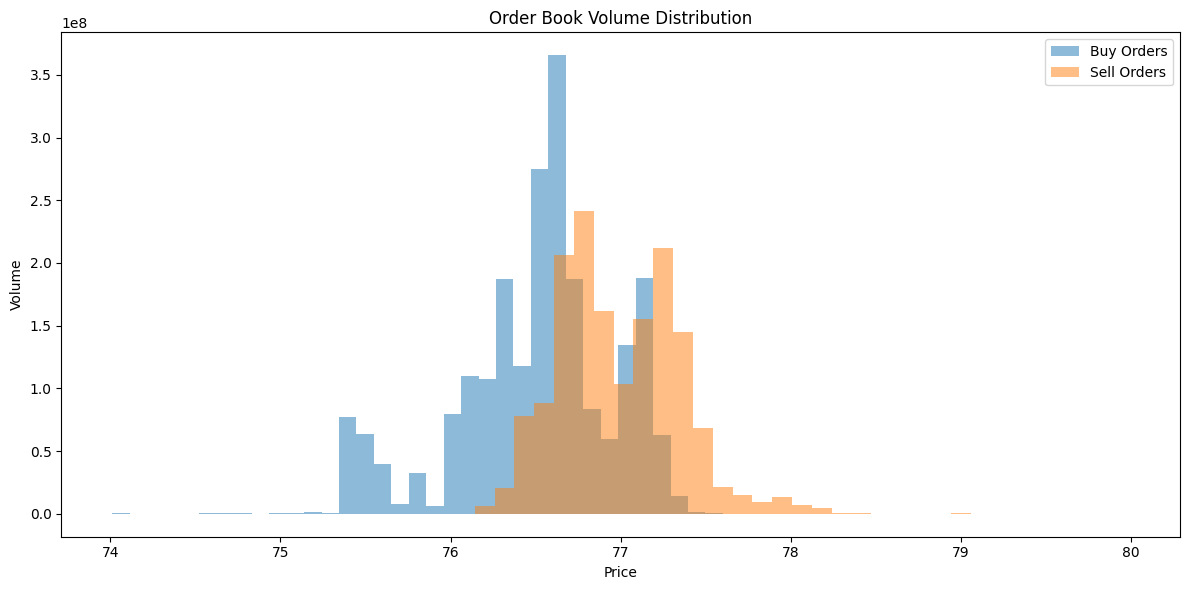

In [89]:
draw_order_book(buy_df[(buy_df.price < 80) & (buy_df.price > 74)], sell_df[(sell_df.price < 80) & (sell_df.price > 74)])

In [60]:
sber_orders_merged_with_trades[sber_orders_merged_with_trades.TRADENO == 2460134764]

,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATETIME,VOLUME_SUM,IS_ICEBERG,BUYORDERNO,SELLORDERNO
882,SBER,B,100000733,10668,2,76.40,1000,2.460135e+09,76.36,2015-03-02 10:00:00.733,6980.0,True,10668.0,10452.0
883,SBER,S,100000733,10452,2,76.36,1000,2.460135e+09,76.36,2015-03-02 10:00:00.733,1000.0,False,10668.0,10452.0


In [59]:
sber_orders_merged_with_trades[sber_orders_merged_with_trades.ORDERNO == 10668]

,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATETIME,VOLUME_SUM,IS_ICEBERG,BUYORDERNO,SELLORDERNO
879,SBER,B,100000733,10668,1,76.4,6440,NaN,NaN,2015-03-02 10:00:00.733,6980.0,True,NaN,NaN
880,SBER,B,100000733,10668,2,76.4,5980,2.460135e+09,76.35,2015-03-02 10:00:00.733,6980.0,True,10668.0,9868.0
882,SBER,B,100000733,10668,2,76.4,1000,2.460135e+09,76.36,2015-03-02 10:00:00.733,6980.0,True,10668.0,10452.0


In [61]:
sber_orders_merged_with_trades[sber_orders_merged_with_trades.ORDERNO == 10452]

,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATETIME,VOLUME_SUM,IS_ICEBERG,BUYORDERNO,SELLORDERNO
812,SBER,S,100000071,10452,1,76.36,1000,NaN,NaN,2015-03-02 10:00:00.071,1000.0,False,NaN,NaN
883,SBER,S,100000733,10452,2,76.36,1000,2.460135e+09,76.36,2015-03-02 10:00:00.733,1000.0,False,10668.0,10452.0


In [59]:
trades_df[trades_df.SECCODE == 'SBER'].TIME.max()

np.int64(183958)

In [25]:
orders_df[orders_df['SECCODE'] == 'SBER'].shape

(1994350, 9)

In [14]:
trades_df[trades_df['SECCODE'] == 'SBER'].shape

(82364, 7)

In [49]:
orders_df.TIME.max()

np.int64(184459956)

In [33]:
orders_df[orders_df.SECCODE == 'SBER'].TRADENO.notna().sum()

np.int64(204538)

In [ ]:
full_channel_df.time = pd.to_datetime(full_channel_df.time)
full_channel_df['timestamp'] = full_channel_df['time'].astype('int64')

ticker_df.time = pd.to_datetime(ticker_df.time)
ticker_df['timestamp'] = ticker_df['time'].astype('int64')